<p align="center">
  <img src="https://www.climate.gov/sites/default/files/2023-06/ENSOblog_animation_SSTA_anom_weekly_2023_Jun.gif" alt="Weekly Sea Surface Temperature Patterns from NOAA" />
</p>

# Atmospheric Data: Nino 3 SST Index

---

## Overview
Generating a wavelet power and phase spectrum from the time-series data [Nino 3 SST Index](https://psl.noaa.gov/gcos_wgsp/Timeseries/Nino3/)

1. Prerequisties
2. Background
3. Download and Organize Nino 3 SST Data
4. Wavelet Input Values
5. PyWavelets
6. Power Spectrum
7. Phase Spectrum

## Prerequisites
| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Matplotlib](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics.html) | Necessary | Plotting on a data |
| [Intro to Pandas](https://foundations.projectpythia.org/core/pandas/pandas.html) | Necessary | Familiarity with working with dataframes |
| [Intro to Numpy](https://foundations.projectpythia.org/core/numpy/numpy-basics.html)| Necessary | Familiarity with working with arrays |
| [Intro to SciPy](https://docs.scipy.org/doc/scipy-1.13.1/tutorial/fft.html) | Helpful | Familiarity with working with wave files and FFT |

- **Time to learn**: 45 minutes

---

## Background

### What is an El Niño?

[Learn more!](https://oceanservice.noaa.gov/facts/ninonina.html)

### Wavelets and Atmospheric Data

Weather is a great example of time-series data. Weather varies in cycles of temperature over weeks due to a huge vareity of variables. Wavelet analysis can be used to find patterns in temperature by analyzing both the temperature and the time when the temperature occurs.

## Imports

In [11]:
import geocat.datafiles as gcd              # accessing nino3 data file
import xarray as xr                         # working with geocat-datafiles

import numpy as np                          # working with arrays
import pandas as pd                         # working with dataframes
import matplotlib.pyplot as plt             # plot data

import pywt                                 # PyWavelets

## Download Nino 3 SST Data

#### Download Nino 3 data from [geocat-datafiles](https://github.com/NCAR/geocat-datafiles/tree/main/ascii_files)

In [14]:
nino3_data = gcd.get('ascii_files/sst_nino3.dat')
nino3_data = np.loadtxt(nino3_data)

## Plot and View Data

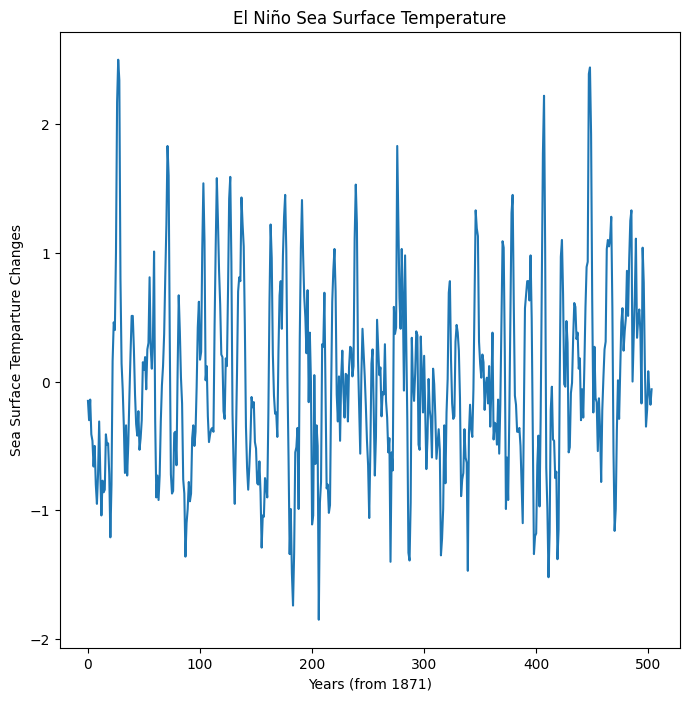

In [26]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title("El Niño Sea Surface Temperature")
plt.xlabel("Years (from 1871)")
plt.ylabel("Sea Surface Temparture Changes")
plt.plot(nino3_data)
plt.show()

### Update the X-Axis
By default, the data loaded in lists the year as time since 1871, we can add a new x-axis to view the years along the x-axis

In [ ]:
# Convert default X-axis from time steps of 0-504 (0-len(nino3_data)) to Years
start_year = 1871
end_year = 1871 + (len(nino3_data) * dt)
x_tickrange = np.arange(start_year, end_year, dt)
start = int(9 / dt)  # 36, starts the x-axis label at 1880 (9 years after start of data)
display_nth = int(20 / dt)  # 80, display x-axis label every 20 years

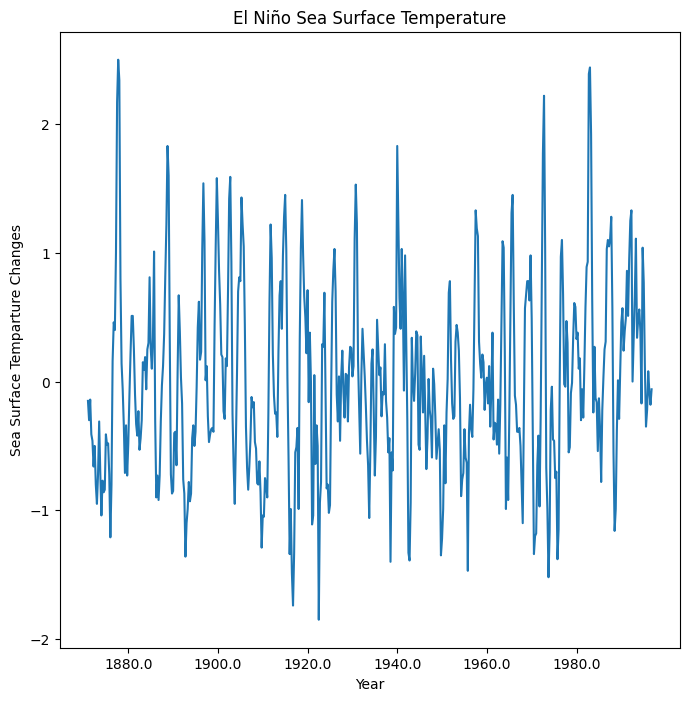

In [29]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title("El Niño Sea Surface Temperature")
plt.xlabel("Year")
plt.ylabel("Sea Surface Temparture Changes")
plt.xticks(range(len(x_tickrange))[start::display_nth], x_tickrange[start::display_nth]) # update x-axis
plt.plot(nino3_data)
plt.show()

## Wavelet Input Values

Wavelet inputs include:

- x: Input time-series data (for example, the time and temperature data from nino3)
- wavelet: mother wavelet name
- dt: sampling period (time between each y-value)
- s0: smallest scale
- dj: spacing between each discrete scales
- jtot: largest scale

In [37]:
dt = 0.25  # sampling period (time between each y-value)
s0 = 0.25  # smallest scale
dj = 0.25  # spacing between each discrete scales
jtot = 64  # largest scale

### Define Complex Morlet

TODO: Choosing a Complex Morlet

In [38]:
bandwidth = 1.5
center_freq = 1
wavelet_mother = f"cmor{bandwidth}-{center_freq}"
print(wavelet_mother)

cmor1.5-1


## Applying Wavelets

In [39]:
scales = np.arange(1, jtot + 1, dj)
wavelet_coeffs, freqs = pywt.cwt(
    data=nino3_data, scales=scales, wavelet=wavelet_mother, sampling_period=dt
)

## Power Spectrum
The power spectrum is the real component of the `wavelet_coeffs`. We can find this value by squaring the absolute value of the `wavelet_coeffs`

In [40]:
power = np.power((abs(wavelet_coeffs)), 2)

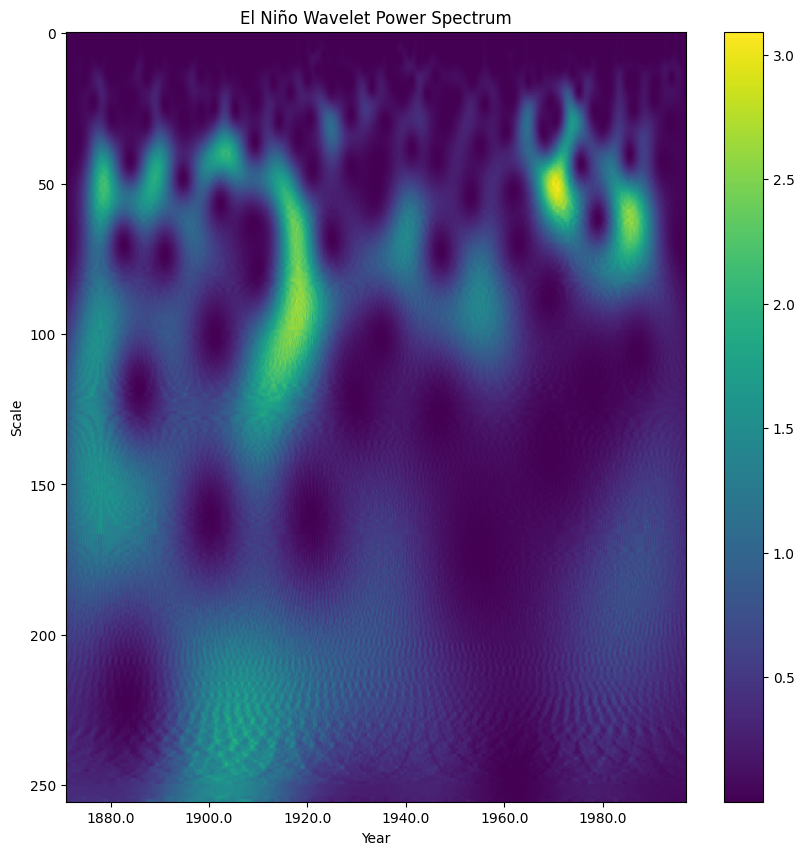

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.imshow(
    power, vmax=(power).max(), vmin=(power).min(), aspect="auto"
)

plt.xticks(range(len(x_tickrange))[start::display_nth], x_tickrange[start::display_nth])
plt.title("El Niño Wavelet Power Spectrum")
plt.xlabel("Year")
plt.ylabel("Scale")
plt.colorbar()
plt.show()

### Better Match Original Graph

We can clean up this diagram to better match the original Torrence and Compo paper by modifying the y-axis and plotting a contour around the data to better view the differences in the color bar

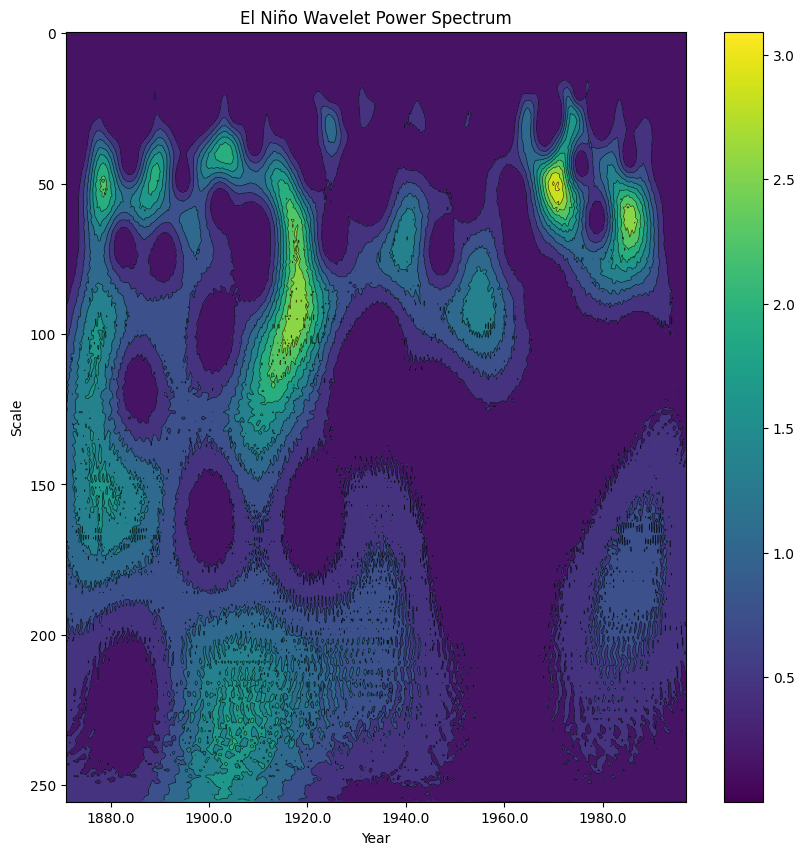

In [42]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot contour around data
plt.contourf(
    power, vmax=(power).max(), vmin=(power).min(), levels=10
)
plt.contour(power, levels=10, colors="k", linewidths=0.5, alpha=0.75)

# Plot Scalogram
plt.imshow(
    power, vmax=(power).max(), vmin=(power).min(), aspect="auto"
)

plt.xticks(range(len(x_tickrange))[start::display_nth], x_tickrange[start::display_nth])
plt.title("El Niño Wavelet Power Spectrum")
plt.xlabel("Year")
plt.ylabel("Scale")
plt.colorbar()
plt.show()

## Cone of Influence
TODO

## Phase Spectrum

In [34]:
# compare the phase spectrum
phase = np.angle(wavelet_coeffs)

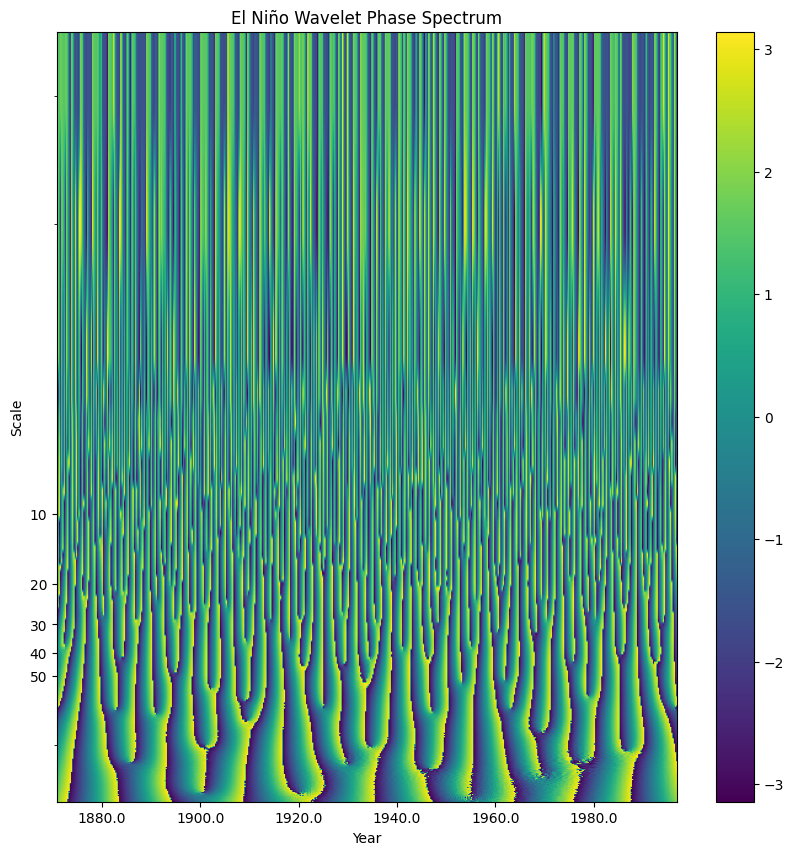

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

# Convert Y-Axis from default to symmetrical log (symlog) with labels
ax.set_yscale("symlog")
ax.invert_yaxis()
ax.set_yticks([10, 20, 30, 40, 50])
ax.set_yticklabels([10, 20, 30, 40, 50])

# Plot scalogram
plt.imshow(
    phase, vmax=(phase).max(), vmin=(phase).min(), aspect="auto"
)

# Convert default X-axis from time steps of 0-504 (0-len(sst_data)) to Years
start_year = 1871
end_year = 1871 + (len(nino3_data) * dt)
x_tickrange = np.arange(start_year, end_year, dt)
start = int(9 / dt)  # 36, starts the x-axis label at 1880 (9 years after start of data)
display_nth = int(20 / dt)  # 80, display x-axis label every 20 years
plt.xticks(range(len(x_tickrange))[start::display_nth], x_tickrange[start::display_nth])

plt.title("El Niño Wavelet Phase Spectrum")
plt.xlabel("Year")
plt.ylabel("Scale")
plt.colorbar()
plt.show()

---

## Summary
Frequency signals appear in more than just audio! A frequency analysis of weather data can inform us about how weather trends change through a year and over a decades worth of data

### What's next?

- [Learn how more about PyWavelets](https://pywavelets.readthedocs.io/en/latest/regression/index.html)


## Resources and references

- ["A Practical Guide to Wavelet Analysis" (Torrence and Compo, 1998)](https://psl.noaa.gov/people/gilbert.p.compo/Torrence_compo1998.pdf)